<center><h2>CS722/822 MACHINE LEARNING </h2></center>
<center><h2>Homework#4 </h2></center>


In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
data = pd.read_csv('A.txt',delimiter=' ', prefix = 'V', header= None)
X=data

In [3]:
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(174, 2)


,V0,V1
0,0.1394,0.8231
1,1.2149,1.8136
2,1.3823,0.8263
3,1.3726,0.8158
4,1.3694,0.8158


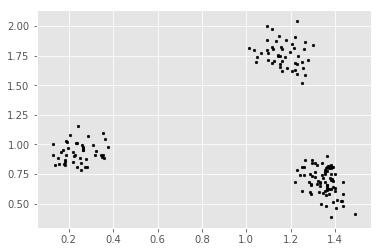

In [4]:
# Getting the values and plotting it
f1 = data['V0'].values
f2 = data['V1'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

# 1.1
> Run your algorithm with different choices of K’s (ranging from 2 to 10 with step size 1).
Calculate the Sum of Squared Errors (SSE) for clustering resulted from each run, and plot
SSE against K in a figure as shown on 8th slide from lecture 15. Note for each K,
multiple runs of the algorithm with different initial centroids may be needed, in order to
have a curve that is monotonically non-increasing.

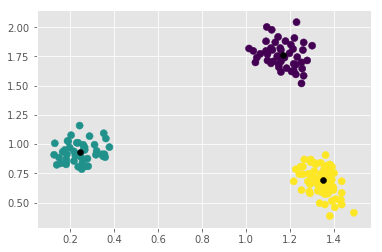

In [5]:
from sklearn.cluster import KMeans
data = pd.read_csv('A.txt',delimiter=' ', prefix = 'V', header= None)
X=data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
#print(X.head())
plt.scatter(X.V0, X.V1, c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=None, alpha=None);


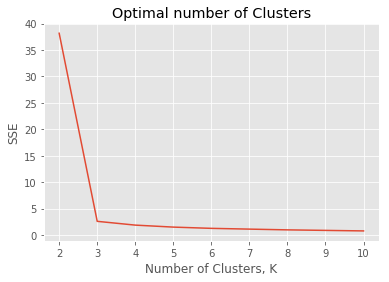

In [6]:
#Run the Algorithm with different K choices (ranging from 2 to 10 with step size 1)
SSE = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    SSE[k] = kmeans.inertia_
plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel('Number of Clusters, K')
plt.ylabel('SSE')
plt.title('Optimal number of Clusters')
plt.show()

# 1.2 
> Run your algorithm with K=3. Show the clustering results in a figure with varying colors
or shapes of data points to represent different cluster assignment (as in those figures on 
7th slide from lecture 15). Note multiple runs may be needed in order to obtain a
satisfactory clustering result. 

In [7]:
data = pd.read_csv('A.txt',delimiter=' ', prefix = 'V', header= None)
print("Input Data and Shape")
print(data.shape)
print(data.head())

f1 = data['V0'].values
f2 = data['V1'].values
X = np.array(list(zip(f1, f2)))
#plt.scatter(f1, f2, c='black', s=7)
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

Input Data and Shape
(174, 2)
       V0      V1
0  0.1394  0.8231
1  1.2149  1.8136
2  1.3823  0.8263
3  1.3726  0.8158
4  1.3694  0.8158


Initial Centroids
[[2. 2.]
 [1. 1.]
 [0. 1.]]


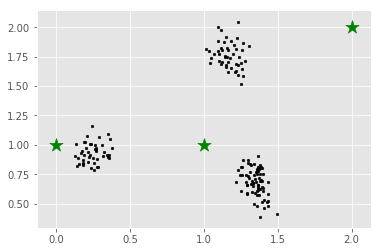

In [8]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)+1, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)+1, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [9]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


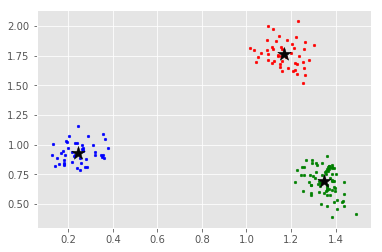

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Reference
> https://mubaris.com/posts/kmeans-clustering/

# 2
> Implement your own agglomerative hierarchical clustering algorithm with Euclidean distance
to measure distance between any pair of data points and four different ways to measure intercluster similarity: MIN, MAX, Group Average, and Distance between Centroids.
Hierarchical clustering can work directly with distance matrix. However, if you prefer to
work on similarity (proximity) matrix as in the examples shown in class, you can use the
following formula to covert distance to similarity, 𝑠𝑖𝑗 = 1/(1 + 𝑑𝑖𝑗), where 𝑠𝑖𝑗 represents
the similarity between any two points 𝑖 and 𝑗, and 𝑑𝑖𝑗 is the distance between the two.

> Apply your algorithm to the dataset stored in “B.txt” coming with this document to obtain
two clusters. This dataset includes the coordinates of 218 2-D data points as plotted in Figure
2, with data points at the center from one cluster and those surrounding from the other. Show
the clustering solutions resulted from all four ways of defining inter-cluster similarity in
plots, with different signs (color or shape) representing different cluster assignment. Which
inter-cluster similarity measure gives you the desired solution? Why?

(218, 2)
       V0      V1
0  1.4629  1.7974
1  1.4984  1.5395
2  0.5565  0.7249
3  0.8081  1.9161
4  1.4016  0.8231


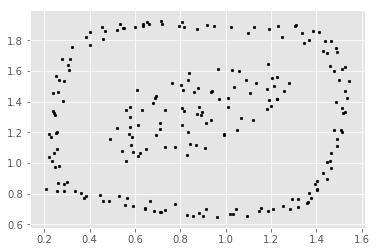

In [11]:
data = pd.read_csv('B.txt',delimiter=' ', prefix = 'V', header= None)
print(data.shape)
print(data.head())
f1 = data['V0'].values
f2 = data['V1'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

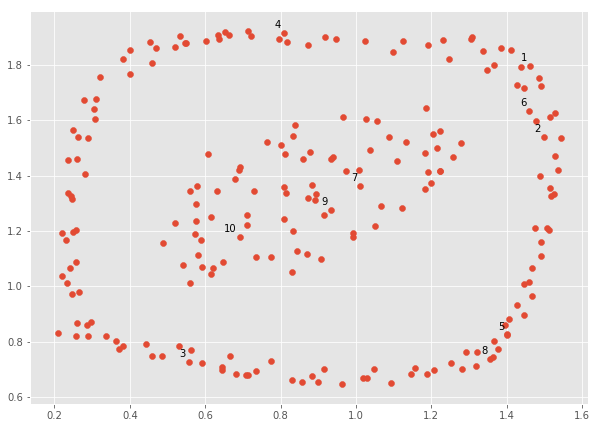

(218, 2)


In [12]:
X=data
X=X.values
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  
print(X.shape)

def aglo(method):
    from scipy.cluster.hierarchy import dendrogram, linkage  
    linked = linkage(X, method)
    labelList = range(1, 219)
    plt.figure(figsize=(45, 15))
    dendrogram(linked, orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts=True)
    plt.show()

#### Minimum Linkage
> This is also known as the Nearest Point Algorithm.
>
> For the single link or MAX version of hierarchical clustering, the proximity of two clusters is defined to be the maximum of the distance between any two points in the different clusters. 

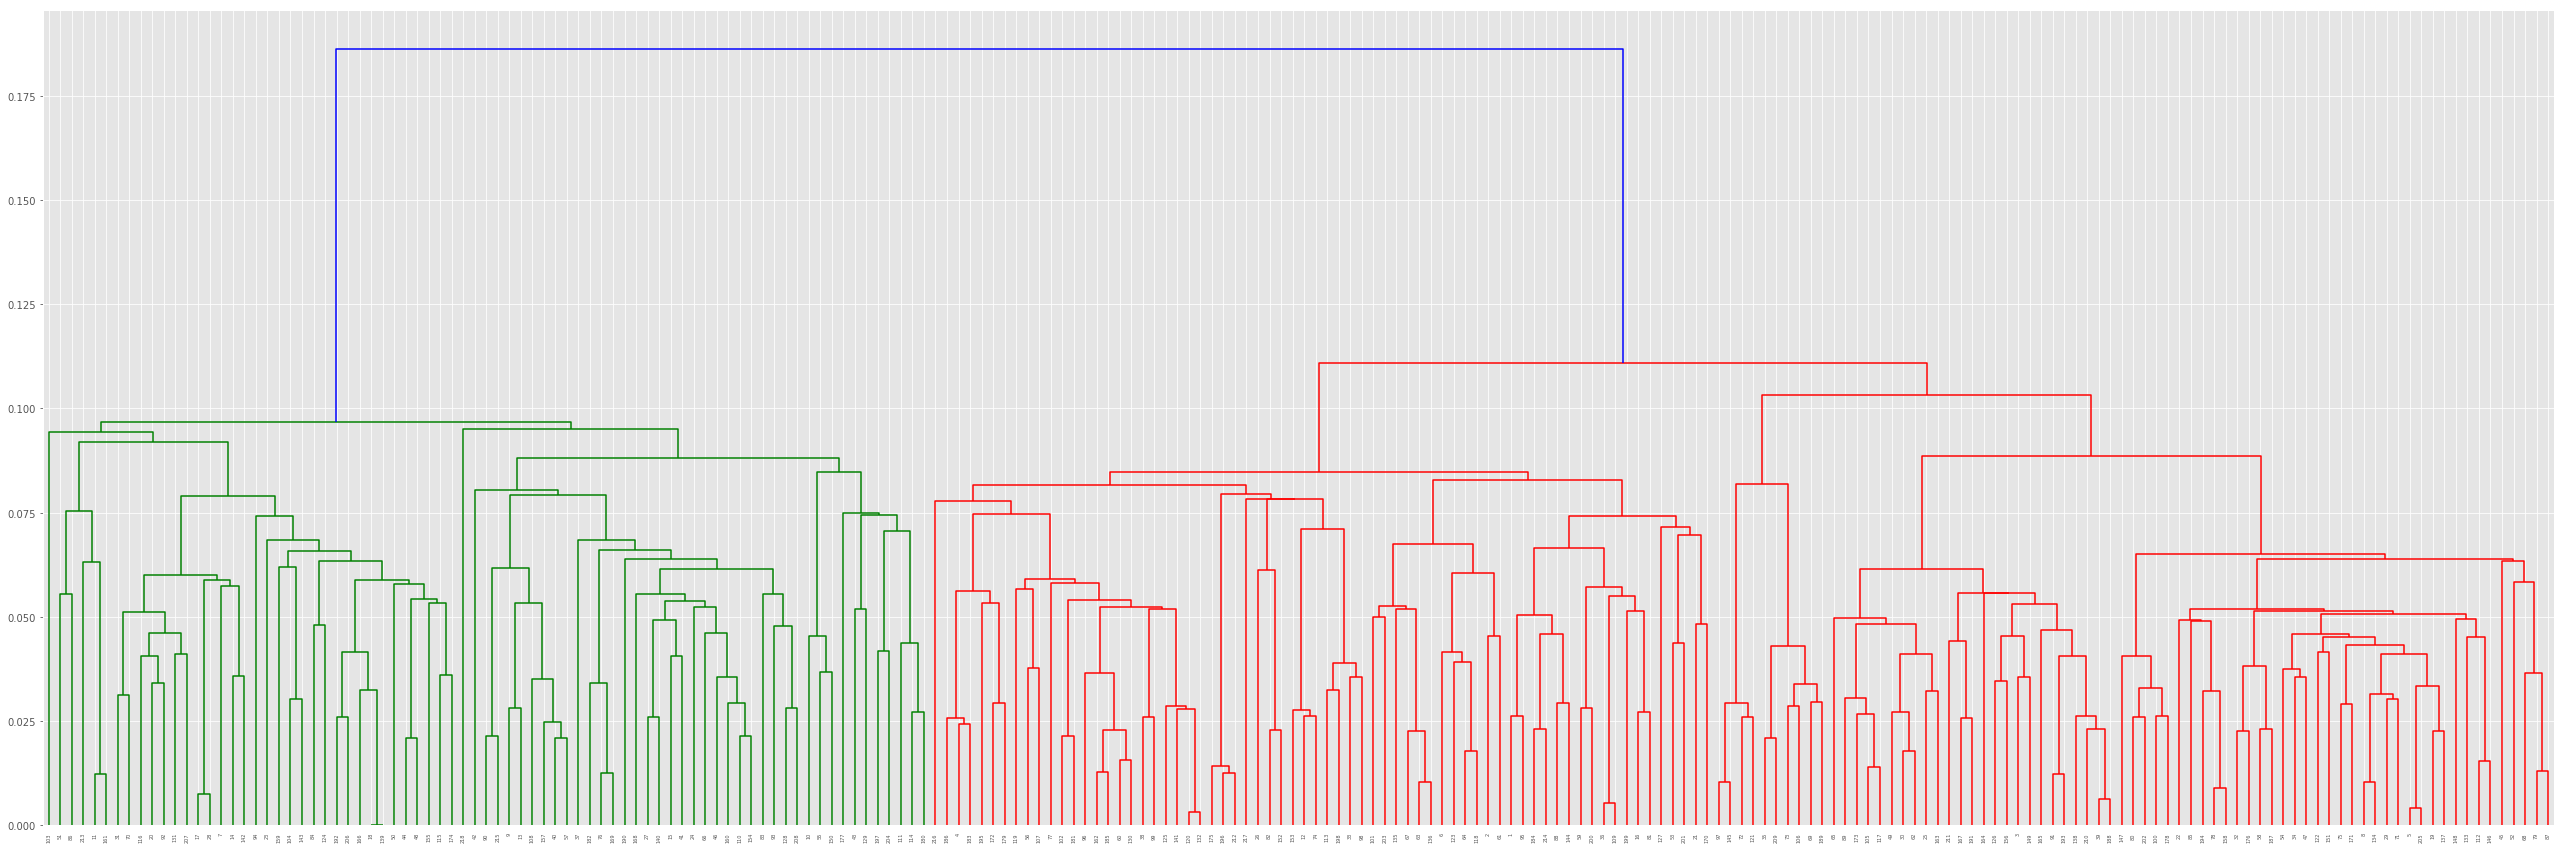

In [13]:
# Minimum
aglo('single')


#### Complete Linkage
> For each pair of clusters, the algorithm computes and merges them to minimize the maximum distance between the clusters (in other words, the distance of the farthest elements)

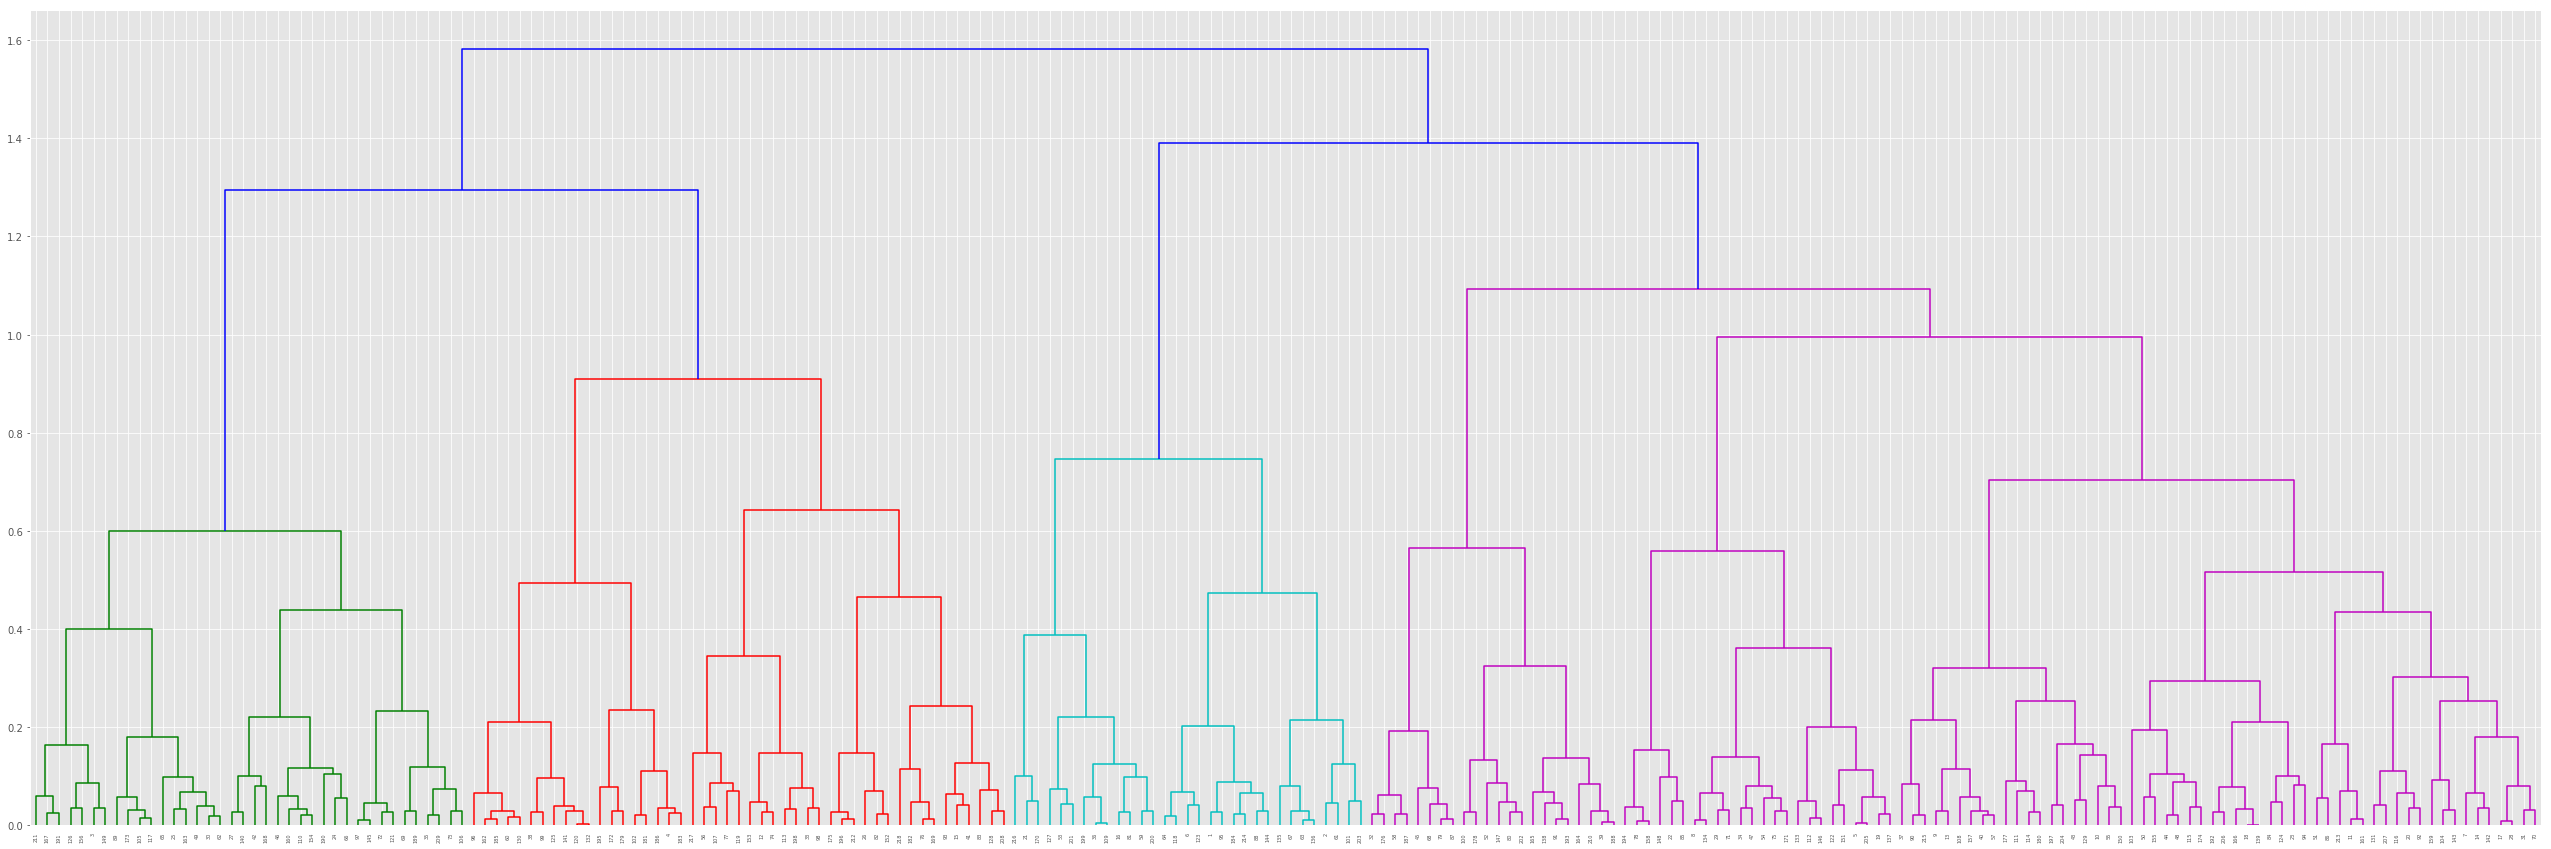

In [14]:
# Maximum
aglo('complete')

#### Average Linkage
> For the group average version of hierarchical clustering, the proximity of two clusters is defined to be the average of the pairwise proximities between all pairs of points in the different clusters. This is an intermediate approach between MIN and MAX

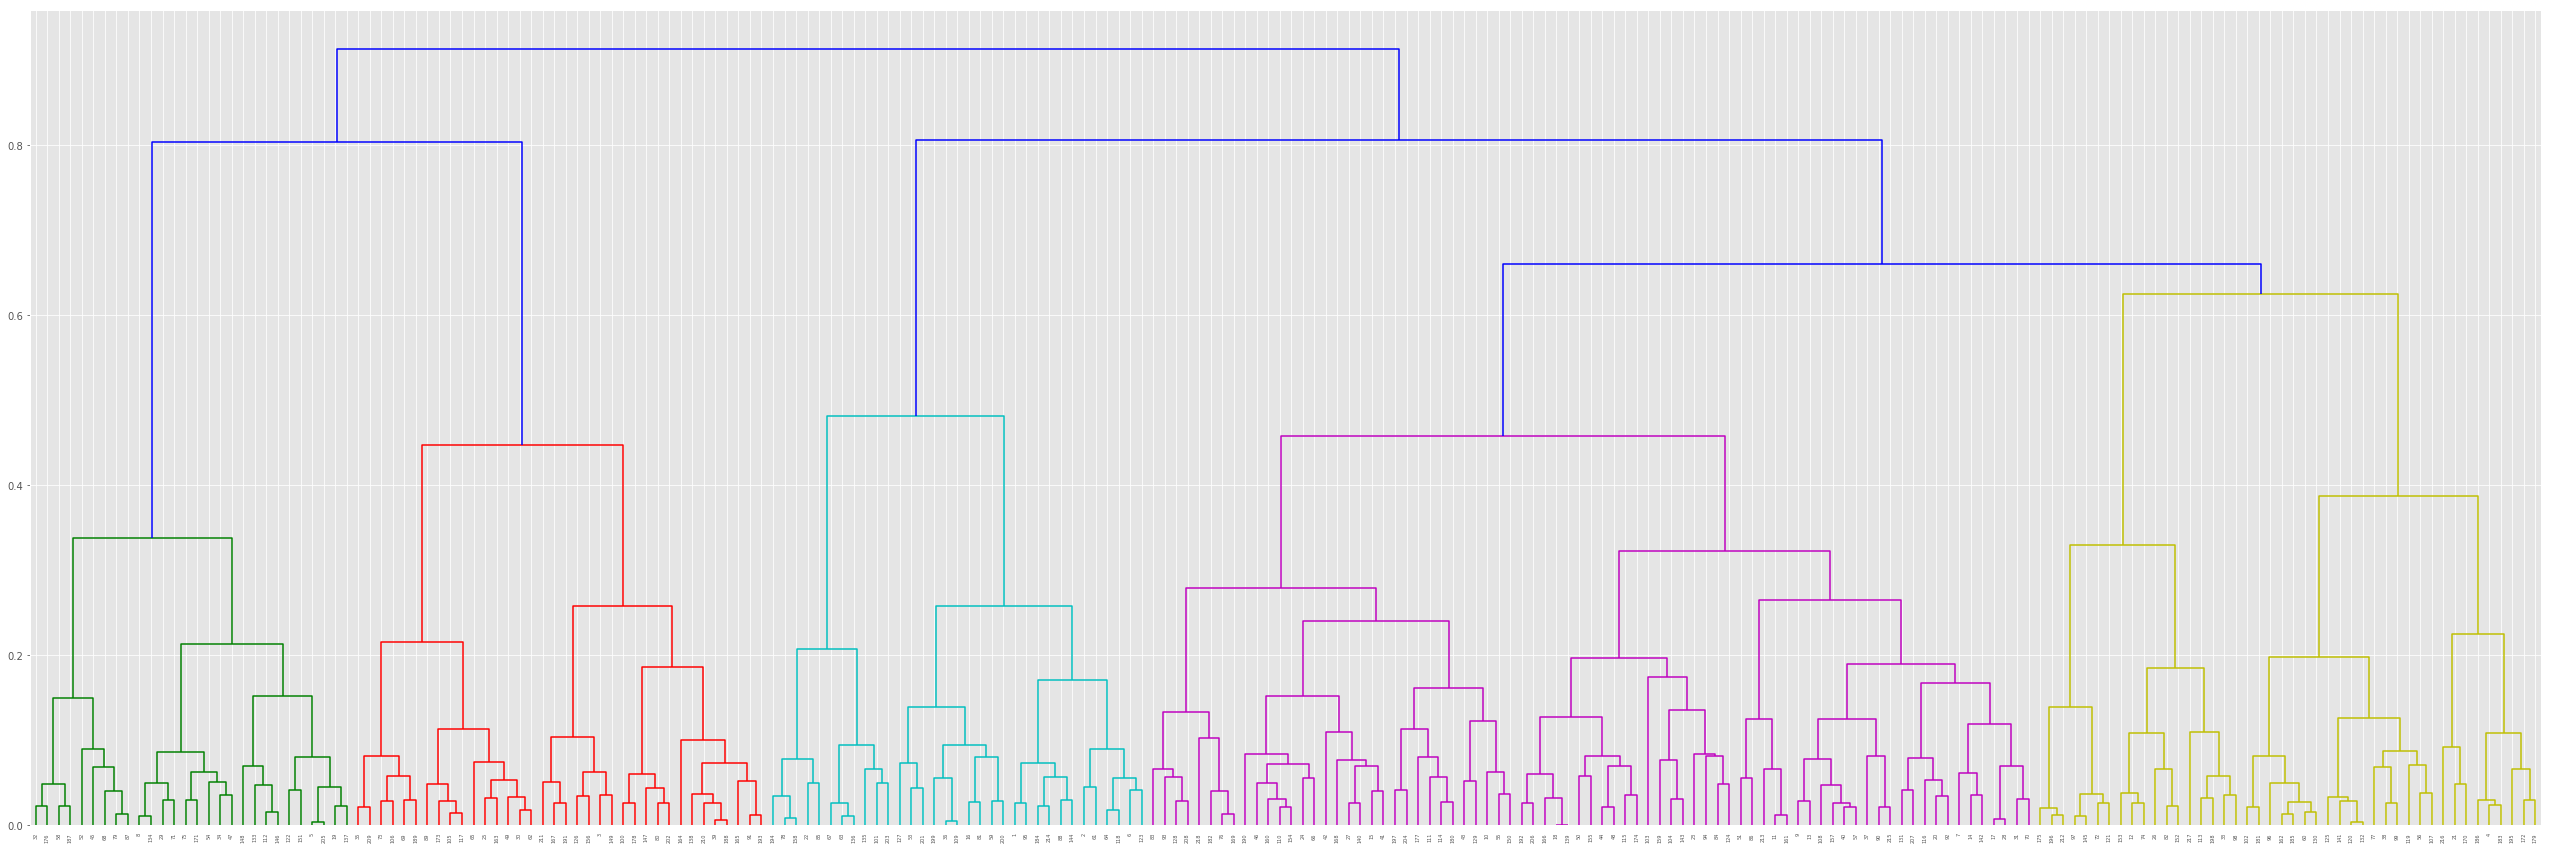

In [15]:
# Average
aglo('average')

#### Centroid Linkage
> When two clusters combined into a new cluster. The new centroid is computed over all the original objects in original clusters. The distance then becomes the Euclidean distance between the centroid of orginal clusters and the centroid of a remaining cluster in the forest. This is also known as the UPGMC algorithm.

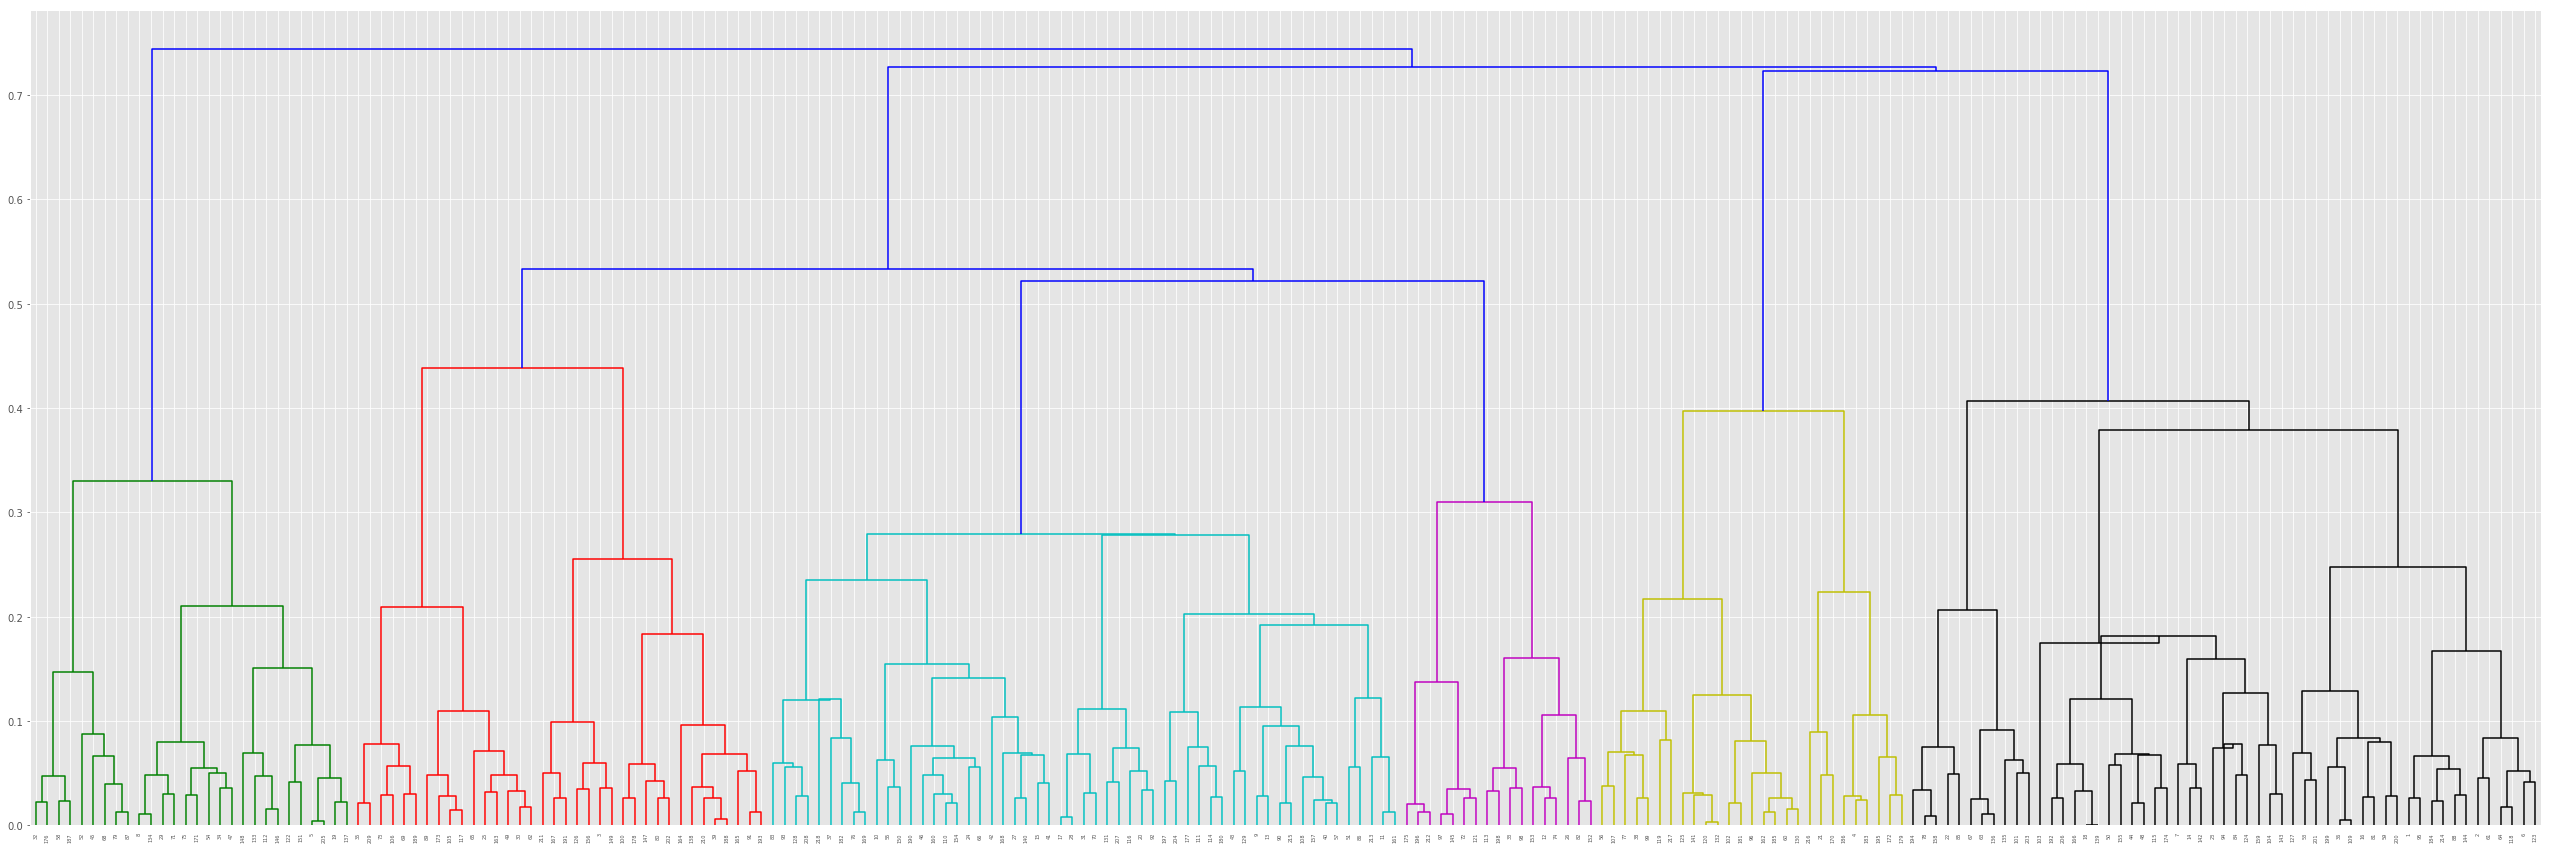

In [16]:
# Distance between the centroid
aglo('centroid')

#### Ward’s Linkage
> Ward method is a centroid method. Centroid method calculates the proximity between two clusters by calculating the distance between the centroids of clusters. For Ward’s method, the proximity between two clusters is defined as the increase in the squared error that results when two clusters are merged. The results of applying Ward’s method to the sample data set of six points. The resulting clustering is somewhat different from those produced by MIN, MAX, and group average.

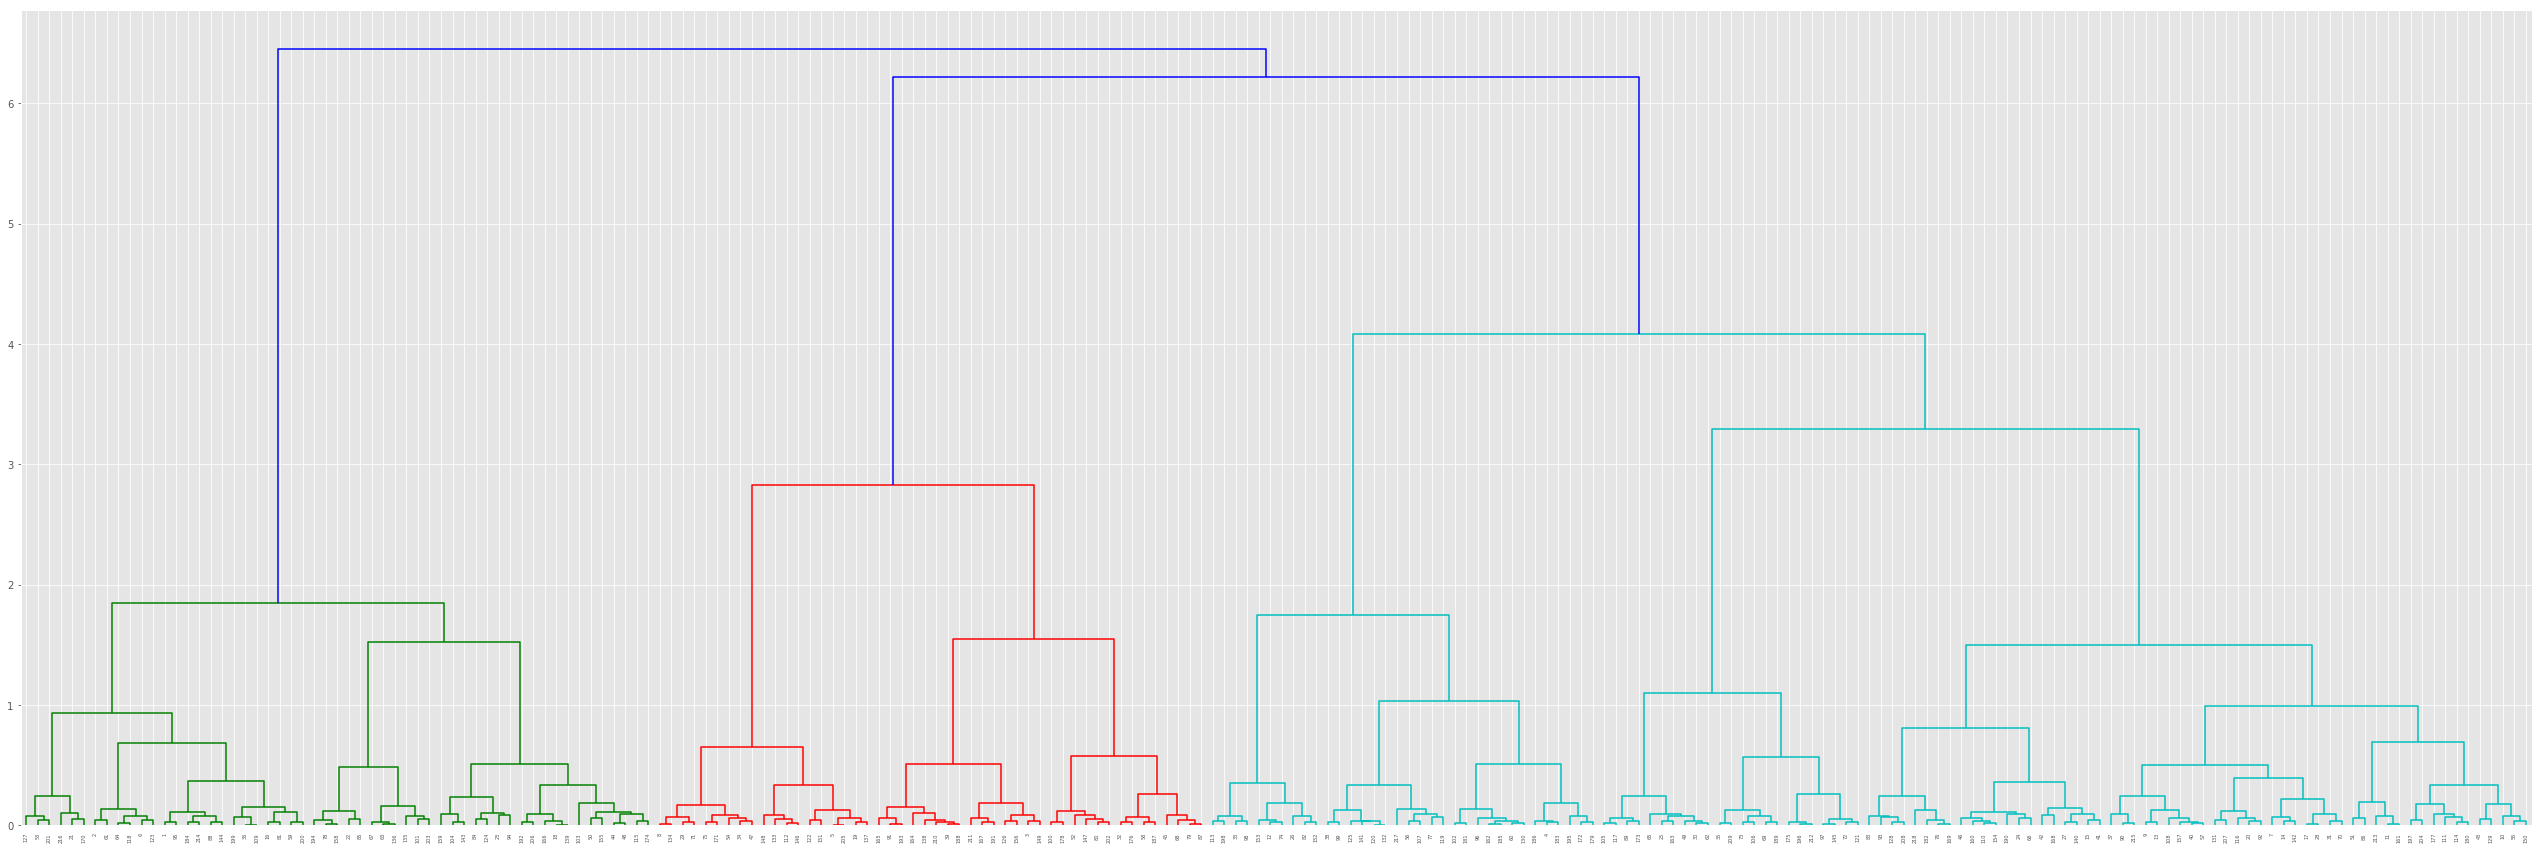

In [17]:
# Ward
aglo('ward')

> - Before any clustering is performed, it is required to determine the proximity matrix containing the distance between each point using a distance function. Then, the matrix is updated to display the distance between each cluster.
> - Change in either of Proximity function, no. of data points or no. of variables will lead to different clustering results and hence different dendrograms.
> - All of the linkage methods i.e. single link, complete link, average, centroid and ward's link can be used for finding dissimilarity between two clusters in hierarchical clustering.
> - Clustering analysis is negatively affected by multicollinearity of features

## References
> https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html